<h2> Data set explanations: </h2>
        
<ul>
<li> There are different features (columns) in our data. These features include demographic and economic information about a person. Analysis of this data can be done using various machine learning or data analysis techniques.</li>

<li> For example, classification models can be trained on this data. The data shows whether a loan application has been approved by the people listed in the "approval" column. The data in the columns "age", "job", "marital", "education", "balance", "housing", "duration" and "campaign" describe the characteristics of these people. The effects of these features on loan approval can be explored, and a machine learning model can be trained to predict whether loan applications will be approved.</li>

<li >Also, relationships between data can be examined. For example, it can be investigated whether there is a correlation between "balance" and "duration". This can help to understand if there is a relationship between a person's bank account balance and loan repayment period. </li>

<li> As a result, various analyzes can be made on the data we have. Using machine learning techniques, the effect of features in the data on the approval of loan applications can be investigated and prediction models can be built. It can also gain different views on the relationships and features between data, and this information can help develop a loan application evaluation system. </li>
</ul>

<h3> Important explanation about the model and data: </h3>
<ul>
<li> The main purpose of this project is to compare the performance of different ML methods in classification and different techniques in handling imbalanced data. </li>
<li> The data size is small having only <strong> 4500 samples and 8 features </strong> while suffering from <strong>skewness</strong>. <strong> So creating a model with good metrics (e.g. high precision, recall and accuracy) seems not possible for this data set. </strong> </li>
</ul>

<h3> Classification methods used in this project: </h3>
<ul>    
<li> XGboost Classifier </li>
<li> Neural Networks </li>
<li> Logisitic Regression </li>
<li> Random Forest Classifier </li>
<li> Support Vector Classifier </li>
<li> Decision Tree Classifier </li>

</ul> 


<h3> Methods for handling skewness used in this project: </h3>
<ul>
<li> Assigning class weights </li>
<li> Ensembling Method (BalancedBaggingClassifier) </li>
<li> Oversampling (SMOTENC) </li>
<li> Undersampling (NearMiss & Random Undersampling) </li>
</ul> 

<h3> Methods for outlier detection in this project: </h3>
<ul>    
<li> Isolation Forest </li>
<li> Local Outlier Factor </li>
</ul> 


In [ ]:
# pip install -U imbalanced-learn

In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
from keras import backend as K

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import collections
from keras import Sequential
from keras import layers
from keras.layers import BatchNormalization, Dropout, Dense
from keras.optimizers import Adam


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [56]:
# reading csv data as dataframe
df = pd.read_csv('C:\\Users\\Afshin\\Pythonfiles\\Kaggle-competition\\Credit approval-imbalance data\\Loan_data.csv')
df.head()

,age,job,marital,education,balance,housing,duration,campaign,approval
0,30.0,unemployed,married,primary,1787,no,79.0,1,no
1,33.0,services,married,secondary,4789,yes,220.0,1,no
2,35.0,management,single,tertiary,1350,yes,185.0,1,no
3,30.0,management,married,tertiary,1476,yes,199.0,4,no
4,59.0,blue-collar,married,secondary,0,yes,226.0,1,no


In [3]:
df.describe()

,age,balance,duration,campaign
count,4519.000000,4521.000000,4.519000e+03,4521.000000
mean,41.381279,1422.657819,5.983921e+03,2.793630
std,13.966475,3009.638142,3.570683e+05,3.109807
min,-38.000000,-3313.000000,-7.990000e+02,1.000000
25%,33.000000,69.000000,1.040000e+02,1.000000
50%,39.000000,444.000000,1.850000e+02,2.000000
75%,49.000000,1480.000000,3.295000e+02,3.000000
max,416.000000,71188.000000,2.395650e+07,50.000000


In [4]:
def data_stats(data):
    
    print(f'Number of samples : {data.shape[0]}')
    print(f'Number of features : {data.shape[1] - 1}')
    
    cat_cols = [colname for colname in data.select_dtypes(["object", "category"])]
    print(f'Name of categorical columns : {cat_cols}')
    num_cols = [colname for colname in data.select_dtypes('number')]
    print(f'Name of numerical columns : {num_cols}')      
    card_dict = {k:data[k].nunique() for k in cat_cols}
    print(f'Number of cardinality in each categirical columns : {card_dict}')      
    nan_cols = data.columns[data.isna().any()].tolist()      
    print(f'Name of columns with nan values : {nan_cols}')
                   

In [5]:
data_stats(df) 

Number of samples : 4521
Number of features : 8
Name of categorical columns : ['job', 'marital', 'education', 'housing', 'approval']
Name of numerical columns : ['age', 'balance', 'duration', 'campaign']
Number of cardinality in each categirical columns : {'job': 12, 'marital': 3, 'education': 4, 'housing': 2, 'approval': 2}
Name of columns with nan values : ['age', 'job', 'marital', 'education', 'housing', 'duration']


In [6]:
# names of categories in each categirical feature
# list of categorical columns
cat_cols = [colname for colname in df.select_dtypes(["object", "category"])]
for colname in cat_cols:
    print(f'Categories in {colname} column : {df[colname].unique()}')


Categories in job column : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown' nan]
Categories in marital column : ['married' 'single' 'divorced' nan]
Categories in education column : ['primary' 'secondary' 'tertiary' 'unknown' nan]
Categories in housing column : ['no' 'yes' nan]
Categories in approval column : ['no' 'yes']


In [7]:
# index with nan values
invalid_rows = [indx for indx, row in df.iterrows() if row.isnull().any()]
df.dropna(inplace=True)

In [8]:
# The classes seems skewed 
print('Approval rate:', round(df['approval'].value_counts()['yes']/len(df) * 100,2), '% of the dataset')
print('No approval rate:', round(df['approval'].value_counts()['no']/len(df) * 100,2), '% of the dataset')

Approval rate: 11.53 % of the dataset
No approval rate: 88.47 % of the dataset


Text(0.5, 1.0, 'Approval rate distributions')

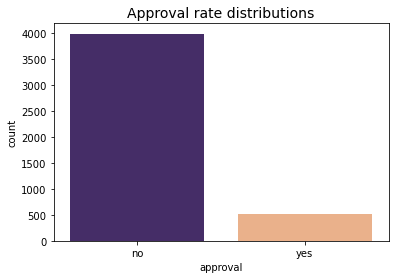

In [9]:
# approval rate distribution 
sns.countplot('approval', data=df, palette=['#432371',"#FAAE7B"])
plt.title('Approval rate distributions', fontsize=14)

<h3> Box plots </h3>
<p>
</p>
<li> It seems the data have too many outliers which is observable in the box plots. </li>

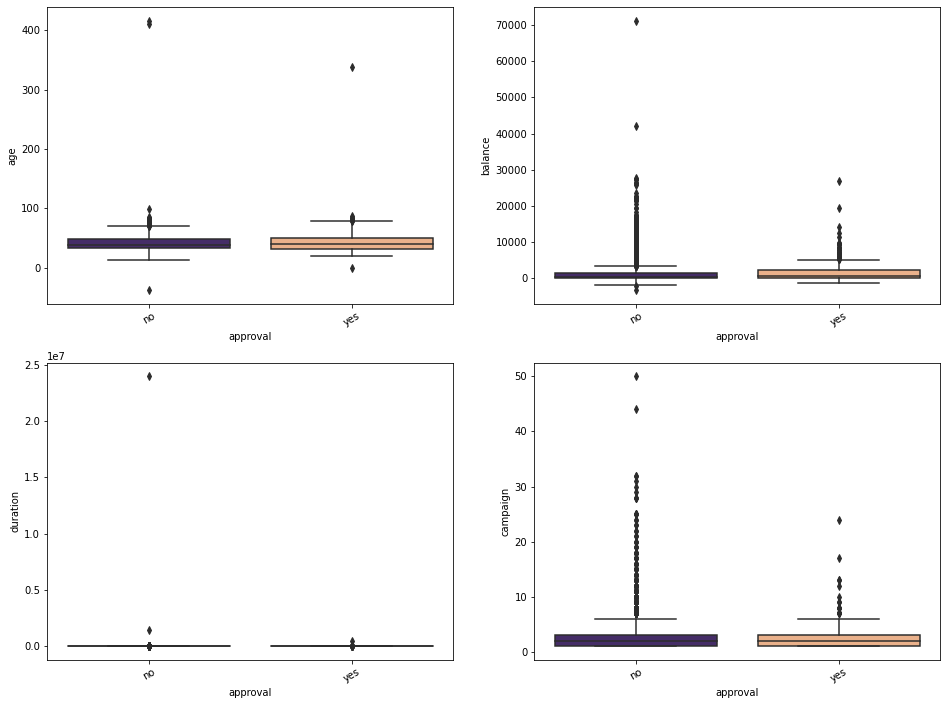

In [43]:
cols = df.describe().columns.tolist()
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.2)

for i, ax in zip(range(10), axes.flat):
    g = sns.boxplot(data=df, x='approval', y= cols[i], palette=['#432371',"#FAAE7B"], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show() 


<h3> Numerical features distribution </h3>
<p>
</p>
<li> Histograms below show the distribution of numerical features (age, balance, duration and campaign) 
versus approval condition. I limit each feature value in x axes to have a better visualization.</li> 

<li> Based on age dist plot, the highest approval and rejection rate apears arounf age 30. </li> 
<li> Based on balance dist plot, the lower the balance the higher rate for approval and rejection. </li>
<li> Based on duration dist plot, the highest rejection rate occurs at duration 100 and followed by highest 
approval rate happening around 250. </li>


(0.0, 40.0)

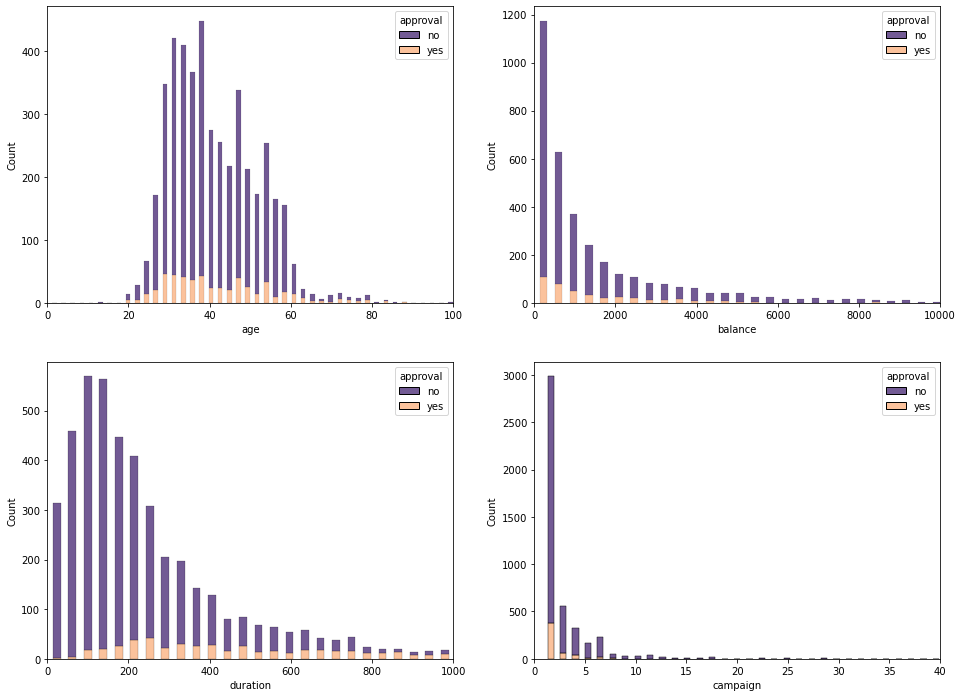

In [42]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.2)
# I cut off duration less than 20,000 to have a better visualization
df_dur = df[df['duration'] < 20000]

sns.histplot(data=df, x="age", bins=200 ,hue="approval", palette=['#432371',"#FAAE7B"] , multiple="stack", shrink=0.5, ax=axes[0,0])
axes[0,0].set_xlim(0, 100)
sns.histplot(data=df, x="balance", bins=200 ,hue="approval", palette=['#432371',"#FAAE7B"] , multiple="stack", shrink=0.5, ax=axes[0,1])
axes[0,1].set_xlim(0, 10000)
sns.histplot(data=df_dur, x="duration", bins=100 ,hue="approval", palette=['#432371',"#FAAE7B"] , multiple="stack", shrink=0.5, ax=axes[1,0])
axes[1,0].set_xlim(0, 1000)
sns.histplot(data=df, x="campaign", bins=40 ,hue="approval", palette=['#432371',"#FAAE7B"] , multiple="stack", shrink=0.5, ax=axes[1,1])
axes[1,1].set_xlim(0, 40)


<h3> Categorical features distribution </h3>
<p>
</p>

<li> The plotted histgrams gives an intuition about the approval rate based on the each feature and for each category within
the feature. For instance, married persons have the higher rate of approval and rejection of the credit card, or for landlords who have housing, the rejection rate is higher than those who does not have housing while the approval rate is the opposite (to me, it does not make sense, but this is what data shows!). <l/i> 
    

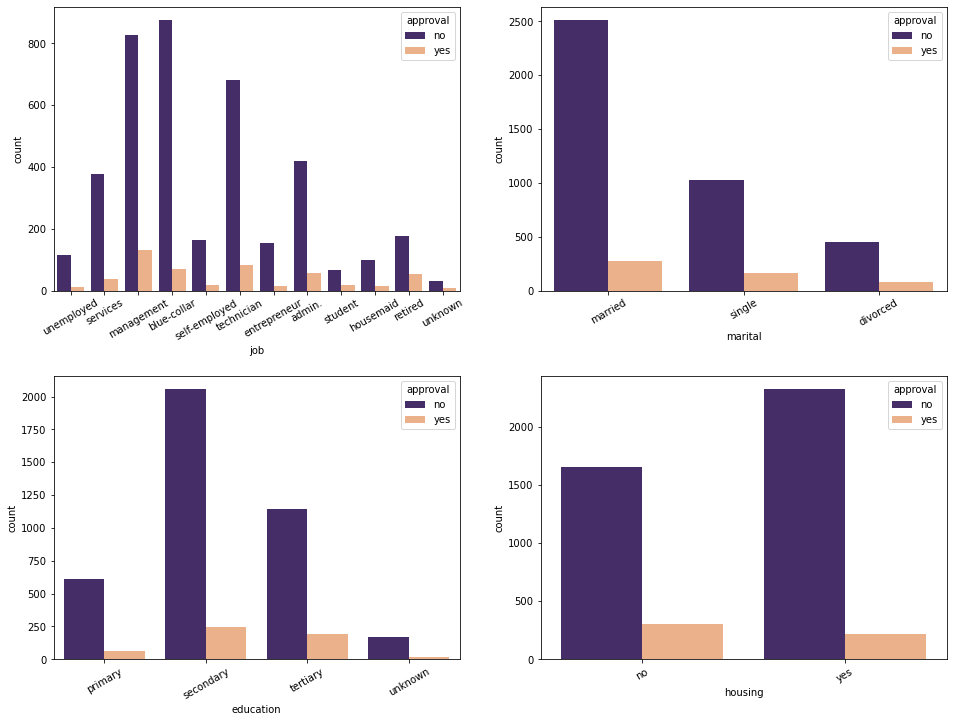

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3)

for i, ax in zip(range(5), axes.flat):
    g = sns.countplot(x=cat_cols[i],data=df, palette=['#432371',"#FAAE7B"],hue='approval', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
plt.show()      


<h3> Correlation between variables </h3>

<p>
</p>

**Note:** We have to make sure we use the balanced data in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the class imbalance in the original dataframe. 
So,I first plot corrolation heatmap for imbalanced data, then try to replot it by balanced data to see if any difference will be noticeable in the correlation.
<p>
</p> 

<li>The heat map shows that the features are not very informative, and there is no strong correlation among features themselves and among features
and target variable. There are some improvement observable in correlation after balancing the data, but the improvement does not
seems promissing. So we can guess that ML mehtods will potentially not be able to achieve high qaulity results. But we have to consider that the correlation here shows only linear interaction between variables. </li>




In [509]:
def feat_corr(input_df):
    corr = input_df.corr()
    plt.figure(figsize=(15,12))
    #plot heat map
    g=sns.heatmap(corr,annot=True,cmap="RdYlGn", vmin=-1, vmax=1)
    plt.title('Feature Correlation')
    
    return plt.show()

In [510]:
# random undersampling
def rnd_undersampling(input_df):

    # shuffling dataframe
    df_shuffled = input_df.sample(frac=1)

    # random undersampling
    dict_dist = Counter(input_df['approval'])
    keyMax = max(dict_dist, key= lambda x: dict_dist[x])
    keyMin = min(dict_dist, key= lambda x: dict_dist[x])
    
    approved_df = df_shuffled.loc[df_shuffled['approval'] == keyMax]
    non_approved_df = df_shuffled.loc[df_shuffled['approval'] == keyMin][:dict_dist[keyMin]]

    df_merged = pd.concat([approved_df, non_approved_df])

    # Shuffle dataframe rows
    balanced_df = df_merged.sample(frac=1, random_state=42)
    
    return balanced_df


In [678]:
# Label encoding
df_labelencoded = df.copy(deep = True)
for col in cat_cols:
    df_labelencoded[col] = LabelEncoder().fit_transform(df[col])

In [679]:
cat_cols

['job', 'marital', 'education', 'housing', 'approval']

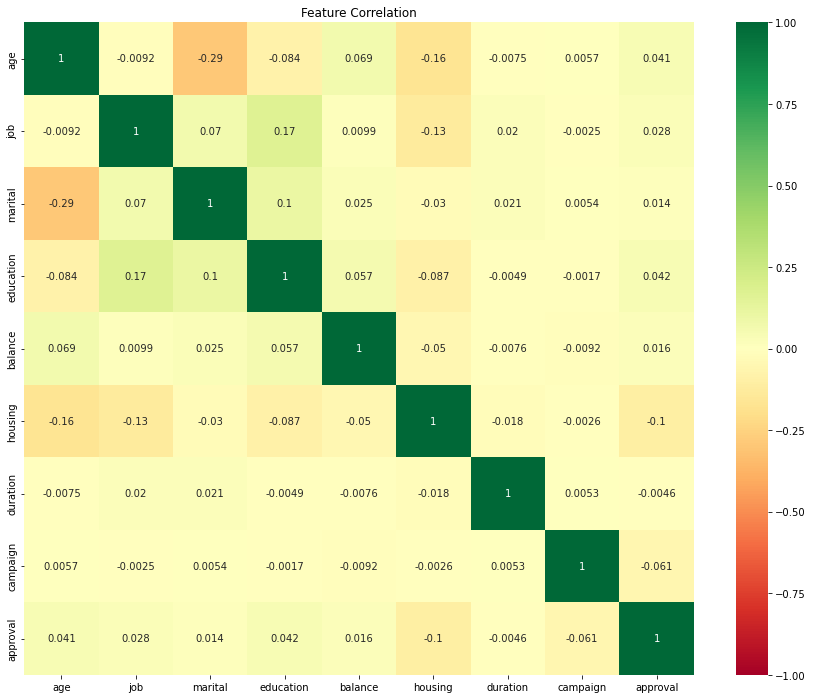

In [680]:
feat_corr(df_labelencoded)

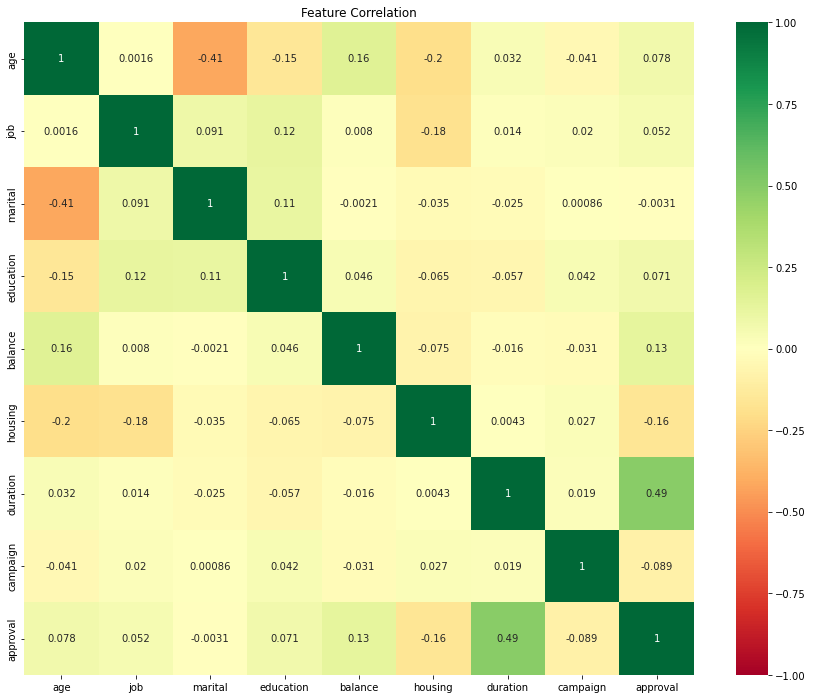

In [681]:
# feature correlation on balanced data
rnd_undersampling(df_labelencoded)
feat_corr(balanced_df)

<h3> Outlier detection </h3>

<p>
</p>

I used LOF(Local Outlier Factor) for outlier detection. The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. Anamolies are labeled as -1

<p>
</p> 

IsolationForest is also added as a comment, we can use this method for outlier detection as well.

<p>
</p> 

In [682]:
def outlier_detection(df_input, method): 

    X = df_input.drop('approval' , axis = 1)
    y= df_input[['approval']]
    
    if method == 'LocalOutlierFactor':
        lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
        anomalies = lof.fit_predict(X)
        X["anamoly"] = anomalies
        
    elif method == 'IsolationForest':
        clf = IsolationForest(n_estimators=50, random_state=42, contamination=0.01)
        clf.fit(X)
        anomalies = clf.predict(X)
        X["anamoly"] = anomalies
    
    else:
        print('method is unknown')
  
    return X

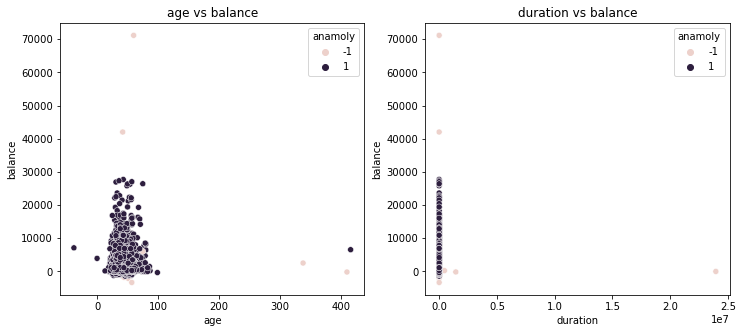

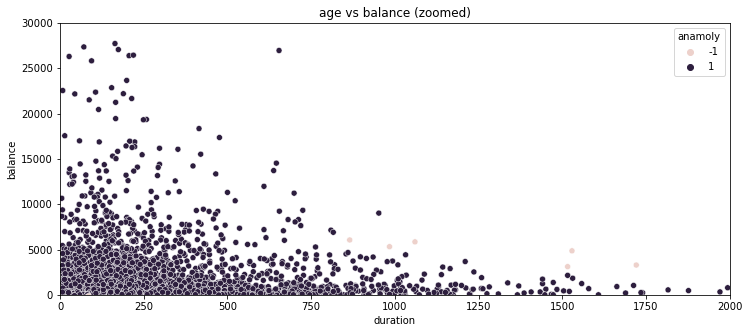

In [683]:
df_anamoly = outlier_detection(df_labelencoded,  method = 'LocalOutlierFactor')

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
gg= sns.scatterplot(x='age', y='balance', hue='anamoly', data=df_anamoly, ax=axes[0]).set(title='age vs balance')
gg= sns.scatterplot(x='duration', y='balance', hue='anamoly', data=df_anamoly, ax=axes[1]).set(title='duration vs balance')

plt.show()

f, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
g= sns.scatterplot(x='duration', y='balance', hue='anamoly', data=df_anamoly)
g.set_xlim(0, 2000)
g.set_ylim(0, 30000)
g.set(title='age vs balance (zoomed)')

plt.show()
    

<h3> Removing outliers from dataframe </h3>

In [684]:
indx =  df_anamoly.index[df_anamoly['anamoly'] == -1]
df_labelencoded = df_labelencoded.drop(index=indx)

<h3> Classification on imbalanced data </h3>

<p>
</p>
As a promissing method, XGBoost is used to classify the imbalanced data. One time it is used without giving class weights 
and the other time it is used with class weights. 

<p>
</p> 



In [914]:
X_imbalance = df_labelencoded.drop('approval' , axis = 1)
y_imbalance = df_labelencoded['approval']

In [915]:
X_train, X_test, y_train, y_test = train_test_split(X_imbalance, y_imbalance, test_size = 0.2, random_state = 42)

In [916]:
# sc= StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [917]:
Counter(y_imbalance)

Counter({0: 3948, 1: 508})

In [918]:
model =  xgb.XGBClassifier(eval_metric  = "logloss")
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [919]:
y_pred = model.predict(X_test)

In [920]:
accuracy  = metrics.accuracy_score(y_test, y_pred)
precision  = metrics.precision_score(y_test, y_pred)
recall  = metrics.recall_score(y_test, y_pred)
print(f'Test accuracy with XGBClassifier  : {round(accuracy,3)}')
print(f'Test precision with XGBClassifier : {round(precision,3)}')
print(f'Test recall with XGBClassifier    : {round(recall,3)}')

Test accuracy with XGBClassifier  : 0.878
Test precision with XGBClassifier : 0.418
Test recall with XGBClassifier    : 0.23


In [921]:
scale_pos_weight= Counter(y_train)[0]/Counter(y_train)[1]
model_weighted = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric  = "logloss")
model_weighted.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=7.735294117647059,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [694]:
y_pred_weighted = model_weighted.predict(X_test)

In [695]:
cm = confusion_matrix(y_test, y_pred_weighted)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])

accuracy  = metrics.accuracy_score(y_test, y_pred_weighted)
precision  = metrics.precision_score(y_test, y_pred_weighted)
recall  = metrics.recall_score(y_test, y_pred_weighted)
print(f'Test accuracy with XGBClassifier with class weights  : {round(accuracy,3)}')
print(f'Test precision with XGBClassifier with class weights : {round(precision,3)}')
print(f'Test recall with XGBClassifier with class weights    : {round(recall,3)}')
conf_matrix

Test accuracy with XGBClassifier with class weights  : 0.858
Test precision with XGBClassifier with class weights : 0.385
Test recall with XGBClassifier with class weights    : 0.45


,Predicted: 0,Predicted: 1
Actual:0,720,72
Actual:1,55,45


<AxesSubplot:>

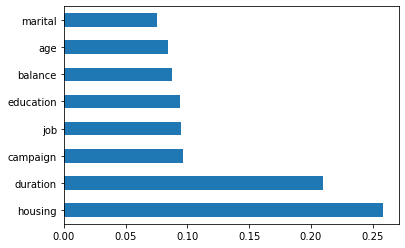

In [922]:
# feature importance
feat_importances = pd.Series(model_weighted.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot.barh()

<h3> Ensembling Method </h3>

<p>
</p>
One of the ways to successfully generalize a model is building n models that use all the samples of the rare class and n-differing samples of the abundant class. For instance,  you want to ensemble 10 models, you would keep e.g. the 1 case of the rare class and randomly sample 100 cases of the abundant class. Then you just split the 100 cases in 100 buckets and train 100 different models.
<p>
</p>

<p>
</p>

**Note:** BalancedBaggingClassifier from imblearn is used for ensembling method.
<p>
</p>



In [697]:
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator= xgb.XGBClassifier(eval_metric  = "logloss"),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(X_train, y_train)
y_pred_bbc = bbc.predict(X_test)
accuracy  = metrics.accuracy_score(y_test, y_pred_bbc)
precision  = metrics.precision_score(y_test, y_pred_bbc)
recall  = metrics.recall_score(y_test, y_pred_bbc)
print(f'Test accuracy with XGBClassifier with ensembling  : {round(accuracy,3)}')
print(f'Test precision with XGBClassifier with ensembling : {round(precision,3)}')
print(f'Test recall with XGBClassifier with ensembling    : {round(recall,3)}')

Test accuracy with XGBClassifier with ensembling  : 0.807
Test precision with XGBClassifier with ensembling : 0.336
Test recall with XGBClassifier with ensembling    : 0.74


<h3> UnderSampling (NearMiss) and OvreSampling (SmoteNC) </h3>

<ul>    
<li> Unsersampling is to reduce the size of abundant class.
By keeping all samples from the rare class and selecting an 
equal number of samples in the abundant class (either randomly or method-based), a balanced new dataset 
can be retrieved for further modelling. </li>

<strong>Note:</strong> NearMiss and random undersampling is used for this project.
</p>
  
<li> On the contrary, oversampling is used when the quantity of data is insufficient. 
It tries to balance dataset by increasing the size of rare samples. Rather than getting 
rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping 
or SMOTE (Synthetic Minority Over-Sampling Technique) </li>

https://arxiv.org/abs/1106.1813 

<strong>Note:</strong> Since the features in the dataset are combination of categorical and numerical variables SmoteNC is used for oversampling this project.

    

In [698]:
# train, test split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_imbalance, y_imbalance, test_size = 0.2, random_state = 42)

In [699]:
X_train_sm = X_train_sm.reset_index(drop=True)
y_train_sm = y_train_sm.reset_index(drop=True)

In [700]:
#classifiers names and models
classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "RandomForest Classifier" : RandomForestClassifier(),
    "KNearest Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "XGBoost Classifier" :  xgb.XGBClassifier(eval_metric  = "logloss")    
}

<p>
</p>

**Note:** We need to pass the index of categorical columns for the SmotheNC method, so we used label encoding instead of one-hot encoding for categorical columns.

<p>
</p> 



In [701]:
if 'approval' in cat_cols : cat_cols.remove('approval') 
cat_col_indx = [X_train_sm.columns.get_loc(cat_col) for cat_col in cat_cols]
cat_col_indx

[1, 2, 3, 5]

In [702]:
df_metric = pd.DataFrame(columns=['classifiers', 'accuracy', 'precision', 'recall', 'f1_score', 'auc'])
df_metric["classifiers"] = list(classifiers.keys())

In [703]:
# Stratified kfold cross-validation splits
sKfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [704]:
def pipeline_model(method, classifiers,X_train, y_train, cat_col_indx):

    row = 0
    for classifier_name, classifier_model in classifiers.items():
        accuracy_list, precision_list, recall_list, f1_list, auc_list = ([] for i in range(5))
        for train_indx, val_indx in sKfold.split(X_train, y_train):
            if method == "oversampling":
                pipeline_im = imbalanced_make_pipeline(SMOTENC(categorical_features = cat_col_indx, sampling_strategy='auto', k_neighbors=3)) 
                X_res, y_res = pipeline_im.fit_resample(X_train.values[train_indx], y_train.values[train_indx])
            if method == "undersampling":
                pipeline_im = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority' , version = 3))
                X_res, y_res = pipeline_im.fit_resample(X_train.values[train_indx], y_train.values[train_indx])
            
            classifier_model.fit(X_res,y_res)
            y_pred_res = classifier_model.predict(X_train.values[val_indx])

            accuracy_list.append(accuracy_score(y_train[val_indx],y_pred_res))
            precision_list.append(precision_score(y_train[val_indx], y_pred_res))
            recall_list.append(recall_score(y_train[val_indx], y_pred_res))
            f1_list.append(f1_score(y_train[val_indx], y_pred_res))
            auc_list.append(roc_auc_score(y_train[val_indx], y_pred_res))

        df_metric['accuracy'].loc[row] = round(np.mean(accuracy_list),3)
        df_metric['precision'].loc[row] = round(np.mean(precision_list),3)
        df_metric['recall'].loc[row] = round(np.mean(recall_list),3)
        df_metric['f1_score'].loc[row] = round(np.mean(f1_list),3)
        df_metric['auc'].loc[row] = round(np.mean(auc_list),3)

        row +=1
    return df_metric
    

In [705]:
approach = "oversampling"
df_metric  = pipeline_model(approach, classifiers, X_train_sm, y_train_sm, cat_col_indx)
print()
print(' Average results of cross validation for each classifier for oversampling')
df_metric


 Average results of cross validation for each classifier for oversampling


,classifiers,accuracy,precision,recall,f1_score,auc
0,Logisitic Regression,0.764,0.292,0.738,0.418,0.753
1,RandomForest Classifier,0.845,0.349,0.4,0.372,0.651
2,KNearest Classifier,0.726,0.232,0.601,0.334,0.671
3,Support Vector Classifier,0.763,0.272,0.63,0.379,0.705
4,DecisionTree Classifier,0.806,0.264,0.382,0.31,0.621
5,XGBoost Classifier,0.862,0.387,0.331,0.356,0.631


In [706]:
approach = "undersampling"
df_metric  = pipeline_model(approach, classifiers, X_train_sm, y_train_sm, cat_col_indx)
print()
print(' Average results of cross validation for each classifier for undersampling')
df_metric


 Average results of cross validation for each classifier for undersampling


,classifiers,accuracy,precision,recall,f1_score,auc
0,Logisitic Regression,0.556,0.164,0.691,0.264,0.615
1,RandomForest Classifier,0.414,0.121,0.659,0.205,0.521
2,KNearest Classifier,0.422,0.107,0.551,0.179,0.478
3,Support Vector Classifier,0.286,0.103,0.681,0.179,0.458
4,DecisionTree Classifier,0.426,0.12,0.632,0.201,0.516
5,XGBoost Classifier,0.457,0.128,0.642,0.213,0.538


<li> Based on what we observe from metric in oversampling, <strong>logisitc regression, support vector classifier and
XGboost </strong> were able to present better results compared to other methods, so lets try to tune some hyperparametrs
for these mehtods to see which one can presents better results.</li>

In [708]:
SM = SMOTENC(categorical_features = cat_col_indx, sampling_strategy='auto', k_neighbors=3)
X_over_res, y_over_res = SM.fit_resample(X_train_sm, y_train_sm)
Counter(y_over_res)

Counter({0: 3156, 1: 3156})

In [709]:
y_count = pd.DataFrame(y_over_res, columns = ['approval'])

Text(0.5, 1.0, 'Approval rate distributions after oversampling')

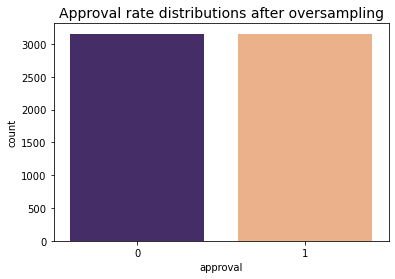

In [710]:
# approval rate distribution
sns.countplot('approval' , data=y_count, palette=['#432371',"#FAAE7B"])
plt.title('Approval rate distributions after oversampling', fontsize=14)

In [711]:
xgb_hp_tunning = xgb.XGBClassifier(eval_metric  = "logloss") 

# Grid of parameters to choose from

xgb_params = {
    "n_estimators": [10, 50, 100],
    "subsample":[0.6, 0.8, 1],
    "learning_rate":[0.01, 0.1, 0.5, 1],
    "gamma":[0.01, 0.1, 1, 5],
    "alpha":[0, 0.1, 0.5]
}

grid_xgb = GridSearchCV(xgb_hp_tunning, xgb_params, cv = 5)

grid_xgb.fit(X_over_res, y_over_res)
xgb_best_model = grid_xgb.best_estimator_

y_pred = xgb_best_model.predict(X_test_sm)
accuracy  = metrics.accuracy_score(y_test_sm, y_pred)
precision  = metrics.precision_score(y_test_sm, y_pred)
recall  = metrics.recall_score(y_test_sm, y_pred)

print(f'Test accuracy with HP tuned XGBClassifier  : {round(accuracy,3)}')
print(f'Test precision with HP tuned XGBClassifier : {round(precision,3)}')
print(f'Test recall with HP tuned XGBClassifier    : {round(recall,3)}')

Test accuracy with HP tuned XGBClassifier  : 0.862
Test precision with HP tuned XGBClassifier : 0.388
Test recall with HP tuned XGBClassifier    : 0.4


In [712]:
logreg_params = {"penalty": ['l1', 'l2', 'elasticnet'], 
                 'C': np.logspace(-4, 4, 10),
                 'solver' : ['lbfgs', 'newton-cg', 'sag', 'liblinear']
                }

grid_logreg = GridSearchCV(LogisticRegression(), logreg_params,  cv = 5)
grid_logreg.fit(X_over_res, y_over_res)
logreg_best_model = grid_logreg.best_estimator_

y_pred = logreg_best_model.predict(X_test_sm)
accuracy  = metrics.accuracy_score(y_test_sm, y_pred)
precision  = metrics.precision_score(y_test_sm, y_pred)
recall  = metrics.recall_score(y_test_sm, y_pred)

print(f'Test accuracy with HP tuned logistic regression  : {round(accuracy,3)}')
print(f'Test precision with HP tuned logistic regression : {round(precision,3)}')
print(f'Test recall with HP tuned logistic regression    : {round(recall,3)}')

Test accuracy with HP tuned logistic regression  : 0.775
Test precision with HP tuned logistic regression : 0.296
Test recall with HP tuned logistic regression    : 0.73


In [ ]:
svc_params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto'],
              'kernel' : ['poly', 'rbf', 'sigmoid']  
             }
  
grid_svc = GridSearchCV(SVC(), svc_params, refit = True, cv = 5)
  
grid_svc.fit(X_over_res, y_over_res)
svc_best_model = grid_svc.best_estimator_

y_pred = svc_best_model.predict(X_test_sm)
accuracy  = metrics.accuracy_score(y_test_sm, y_pred)
precision  = metrics.precision_score(y_test_sm, y_pred)
recall  = metrics.recall_score(y_test_sm, y_pred)

print(f'Test accuracy with HP tuned SVC  : {round(accuracy,3)}')
print(f'Test precision with HP tuned SVC : {round(precision,3)}')
print(f'Test Recall with HP tuned SVC    : {round(recall,3)}')

<li> It seems that logistic regression ans SVC were able to provide competitive or even better results than XGboost in this example.
There are some studies (linked as below) show that logistic regression performs well in imbalanced classification.</li>

<a href="https://pdfs.semanticscholar.org/2b17/566232141db0e87b7034b7910894455ccccc.pdf?_gl=1*1jvy068*_ga*NzA4MzQ5NjIxLjE2Nzg5MTM0Mzc.*_ga_H7P4ZT52H5*MTY3ODkxMzQzNi4xLjAuMTY3ODkxMzQzNy4wLjAuMA..">S Lai, N Md Shahri, M Mohamad, H Abdul Rahman and A Rambli. "Comparing the Performance of AdaBoost, XGBoost, and Logistic Regression for Imbalanced Data" Mathematics and Statistics 9(3): 379-385, 2021. </a>

<p>  
<li> The reason of the outperfromance of log reg to tree based methods might be to some multicollinearity (based on corr matrix we dont have multicollinearity in our dataset), outliers (outliers are also removed from dataset), imbalanced percentage in the data. </li>
<p>
</p>
<li> Another reason is that usually gradient boosting approaches have poor probability calibration in comparison to logistic regression models. <li>

<a href = "https://arxiv.org/abs/1207.1403"> Niculescu-Mizi & Caruana (2005) "Obtaining Calibrated Probabilities from Boosting" </a>


<h3> Neural Networks (undersampling (random) and oversampling (SMOTENC)) </h3>
<p>
</p>
<li> In this section, two neural networks model are created for undersampling and oversampling.</li>
<p>
</p>
<li> <strong>Note:</strong> like previous models we are only allowed to undersample/oversample the 
training data set and should not change the validation or test dataset distribution, otherwise we leak the data
and will witness a very good performance on the model which is not realistic.</li>

<p>
</p>
<li> <strong>Important Note: Due to low quality dataset that we have (no observed correlation between features and target 
variable, few number of samples and features at the same time ) we witness relatively high loss in both NN models.</strong> </li>

In [764]:
# shuffling the data and scaling the features
shuffled_df = df_labelencoded.sample(frac = 1)
y_shuffled_df = shuffled_df[['approval']]
scaled_features = StandardScaler().fit_transform(shuffled_df.iloc[:, :8].values)
x_shuffled_df = pd.DataFrame(scaled_features, index=shuffled_df.index, columns=shuffled_df.columns[:8])
shuffled_df = pd.concat([x_shuffled_df,y_shuffled_df], axis = 1)

# splitting train, validation and test dataframes
df_test = shuffled_df.iloc[:int(0.12*shuffled_df.shape[0]),:]
df_train_f = shuffled_df.drop(index = df_test.index)
df_val = df_train_f.iloc[:int(0.12*df_train_f.shape[0]),:]
df_train = df_train_f.drop(index = df_val.index)

# creating positive and negative df for undersampling  
pos_df = df_train.loc[df_train['approval'] == 0][:Counter(df_train['approval'])[1]]
neg_df = df_train.loc[df_train['approval'] == 1]

# merging dataframes
df_merged = pd.concat([pos_df, neg_df])
df_merged = df_merged.sample(frac = 1)

# creating undersampled train dataset  
X_train_undrsmpl= df_merged.drop('approval' , axis = 1)
y_train_undrsmpl = np.array(df_merged['approval'])

# creating untouched validation and test datsets
X_test = df_test.drop('approval', axis = 1)
y_test = df_test['approval']
X_val = df_val.drop('approval', axis = 1)
y_val = df_val['approval']

<h3> Neural Networks (undersampling)  </h3>

In [765]:
def underSample_Base_model():

    model = Sequential()
    input_shapes = (8,)
    model.add(Dense(128, activation='relu', input_shape = input_shapes))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

NN_model_un = underSample_Base_model()

In [766]:
NN_model_un.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               1152      
                                                                 
 batch_normalization_22 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_23 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_23 (Dropout)        (None, 64)              

In [767]:
opt = Adam(learning_rate=0.005)
NN_model_un.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

In [768]:
NN_model_un.fit(X_train_undrsmpl, y_train_undrsmpl, validation_data = (X_val, y_val), batch_size=128, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
7/7 - 1s - loss: 0.7796 - accuracy: 0.6170 - val_loss: 0.7268 - val_accuracy: 0.5000 - 1s/epoch - 147ms/step
Epoch 2/100
7/7 - 0s - loss: 0.6293 - accuracy: 0.7163 - val_loss: 0.7135 - val_accuracy: 0.5447 - 55ms/epoch - 8ms/step
Epoch 3/100
7/7 - 0s - loss: 0.5656 - accuracy: 0.7481 - val_loss: 0.7065 - val_accuracy: 0.5468 - 52ms/epoch - 7ms/step
Epoch 4/100
7/7 - 0s - loss: 0.5284 - accuracy: 0.7570 - val_loss: 0.6834 - val_accuracy: 0.5787 - 56ms/epoch - 8ms/step
Epoch 5/100
7/7 - 0s - loss: 0.5127 - accuracy: 0.7659 - val_loss: 0.6794 - val_accuracy: 0.5702 - 55ms/epoch - 8ms/step
Epoch 6/100
7/7 - 0s - loss: 0.5092 - accuracy: 0.7634 - val_loss: 0.6619 - val_accuracy: 0.6149 - 52ms/epoch - 7ms/step
Epoch 7/100
7/7 - 0s - loss: 0.5152 - accuracy: 0.7443 - val_loss: 0.6539 - val_accuracy: 0.6191 - 57ms/epoch - 8ms/step
Epoch 8/100
7/7 - 0s - loss: 0.5020 - accuracy: 0.7774 - val_loss: 0.6557 - val_accuracy: 0.6064 - 56ms/epoch - 8ms/step
Epoch 9/100
7/7 - 0s - loss: 0.5

Epoch 69/100
7/7 - 0s - loss: 0.4257 - accuracy: 0.8028 - val_loss: 0.5416 - val_accuracy: 0.7106 - 52ms/epoch - 7ms/step
Epoch 70/100
7/7 - 0s - loss: 0.4349 - accuracy: 0.8028 - val_loss: 0.5422 - val_accuracy: 0.7128 - 54ms/epoch - 8ms/step
Epoch 71/100
7/7 - 0s - loss: 0.4359 - accuracy: 0.8142 - val_loss: 0.5235 - val_accuracy: 0.7362 - 52ms/epoch - 7ms/step
Epoch 72/100
7/7 - 0s - loss: 0.4465 - accuracy: 0.7863 - val_loss: 0.5234 - val_accuracy: 0.7234 - 52ms/epoch - 7ms/step
Epoch 73/100
7/7 - 0s - loss: 0.4320 - accuracy: 0.8130 - val_loss: 0.5450 - val_accuracy: 0.7149 - 52ms/epoch - 7ms/step
Epoch 74/100
7/7 - 0s - loss: 0.4254 - accuracy: 0.8155 - val_loss: 0.5643 - val_accuracy: 0.7021 - 64ms/epoch - 9ms/step
Epoch 75/100
7/7 - 0s - loss: 0.4142 - accuracy: 0.8206 - val_loss: 0.5918 - val_accuracy: 0.6809 - 62ms/epoch - 9ms/step
Epoch 76/100
7/7 - 0s - loss: 0.4223 - accuracy: 0.7977 - val_loss: 0.5988 - val_accuracy: 0.6915 - 57ms/epoch - 8ms/step
Epoch 77/100
7/7 - 0s - 

In [769]:
y_pred = NN_model_un.predict(X_test)

17/17 [==============================] - 0s 1ms/step


In [770]:
y_pred = np.squeeze(y_pred)
y_pred = (y_pred >= 0.5)

In [771]:
from sklearn import metrics

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_precision = metrics.precision_score(y_test, y_pred)
test_recall = metrics.recall_score(y_test, y_pred)

print(f'Test_accuracy with NN (undersampling)  : {round(test_accuracy,3)}')
print(f'Test_precision with NN (undersampling) : {round(test_precision,3)}')
print(f'Test_recall with NN (undersampling)    : {round(test_recall,3)}')

Test_accuracy with NN (undersampling)  : 0.751
Test_precision with NN (undersampling) : 0.259
Test_recall with NN (undersampling)    : 0.764


<h3> Neural Networks (oversampling)  </h3>

In [772]:
X = df_labelencoded.drop('approval', axis = 1)
X = StandardScaler().fit_transform(X)
y = np.array(df_labelencoded['approval'])

In [773]:
# please note that we are seperating, train, test and validation sets here, validation and test datasets 
# must not be oversampled due to data leakage problem!

In [774]:
X_train_f, X_test, y_train_f, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_f, y_train_f, test_size = 0.2, random_state = 42)

In [775]:
SM = SMOTENC(categorical_features = cat_col_indx, k_neighbors=3)
X_train_oversmpl, y_train_oversmpl = SM.fit_resample(X_train, y_train)

In [776]:
def overSample_Base_model():

    model = Sequential()
    input_shapes = (8,)
    model.add(Dense(128, activation='relu', input_shape = input_shapes))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

NN_model = overSample_Base_model()    

In [777]:
NN_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1152      
                                                                 
 batch_normalization_24 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_25 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 64)              

In [778]:
opt = Adam(learning_rate=0.005)
NN_model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])

In [779]:
history = NN_model.fit(X_train_oversmpl, y_train_oversmpl, validation_data=(X_val,y_val), batch_size=128, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
43/43 - 1s - loss: 0.6132 - accuracy: 0.7187 - val_loss: 0.5655 - val_accuracy: 0.7177 - 1s/epoch - 25ms/step
Epoch 2/100
43/43 - 0s - loss: 0.5030 - accuracy: 0.7594 - val_loss: 0.5877 - val_accuracy: 0.6517 - 195ms/epoch - 5ms/step
Epoch 3/100
43/43 - 0s - loss: 0.4794 - accuracy: 0.7744 - val_loss: 0.5137 - val_accuracy: 0.7348 - 158ms/epoch - 4ms/step
Epoch 4/100
43/43 - 0s - loss: 0.4758 - accuracy: 0.7727 - val_loss: 0.5215 - val_accuracy: 0.7005 - 145ms/epoch - 3ms/step
Epoch 5/100
43/43 - 0s - loss: 0.4639 - accuracy: 0.7763 - val_loss: 0.5097 - val_accuracy: 0.7058 - 151ms/epoch - 4ms/step
Epoch 6/100
43/43 - 0s - loss: 0.4667 - accuracy: 0.7824 - val_loss: 0.5040 - val_accuracy: 0.7045 - 149ms/epoch - 3ms/step
Epoch 7/100
43/43 - 0s - loss: 0.4608 - accuracy: 0.7837 - val_loss: 0.4758 - val_accuracy: 0.7309 - 152ms/epoch - 4ms/step
Epoch 8/100
43/43 - 0s - loss: 0.4549 - accuracy: 0.7837 - val_loss: 0.4617 - val_accuracy: 0.7282 - 148ms/epoch - 3ms/step
Epoch 9/10

Epoch 67/100
43/43 - 0s - loss: 0.3870 - accuracy: 0.8242 - val_loss: 0.4576 - val_accuracy: 0.7573 - 140ms/epoch - 3ms/step
Epoch 68/100
43/43 - 0s - loss: 0.3887 - accuracy: 0.8249 - val_loss: 0.4111 - val_accuracy: 0.7810 - 164ms/epoch - 4ms/step
Epoch 69/100
43/43 - 0s - loss: 0.3856 - accuracy: 0.8258 - val_loss: 0.4260 - val_accuracy: 0.7810 - 200ms/epoch - 5ms/step
Epoch 70/100
43/43 - 0s - loss: 0.3878 - accuracy: 0.8310 - val_loss: 0.4507 - val_accuracy: 0.7665 - 176ms/epoch - 4ms/step
Epoch 71/100
43/43 - 0s - loss: 0.3842 - accuracy: 0.8309 - val_loss: 0.3937 - val_accuracy: 0.8061 - 172ms/epoch - 4ms/step
Epoch 72/100
43/43 - 0s - loss: 0.3832 - accuracy: 0.8310 - val_loss: 0.4172 - val_accuracy: 0.7955 - 144ms/epoch - 3ms/step
Epoch 73/100
43/43 - 0s - loss: 0.3872 - accuracy: 0.8270 - val_loss: 0.4479 - val_accuracy: 0.7797 - 148ms/epoch - 3ms/step
Epoch 74/100
43/43 - 0s - loss: 0.3893 - accuracy: 0.8281 - val_loss: 0.4721 - val_accuracy: 0.7520 - 156ms/epoch - 4ms/step


In [780]:
y_pred = NN_model.predict(X_test)

21/21 [==============================] - 0s 2ms/step


In [781]:
y_pred = np.squeeze(y_pred)
y_pred = (y_pred >= 0.5)

In [782]:
from sklearn import metrics

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_precision = metrics.precision_score(y_test, y_pred)
test_recall = metrics.recall_score(y_test, y_pred)


print(f'Test_accuracy with NN (oversampling)  : {round(test_accuracy,3)}')
print(f'Test_precision with NN (oversampling) : {round(test_precision,3)}')
print(f'Test_recall with NN (oversampling)    : {round(test_recall,3)}')

Test_accuracy with NN (oversampling)  : 0.803
Test_precision with NN (oversampling) : 0.341
Test_recall with NN (oversampling)    : 0.7


<h3> Results comparison for some of the promissing methods </h3>
<p>
</p>
<li> The most promising methods are listed as </li>
<ul>
<li> Ensembling (XGBoost) </li>
<li> Logistic Regression with tuned HP </li>
<li> Support Vector Classifier (oversampling) </li>
<li> Neural Network (oversampling) </li>
<p>
</p>
<strong>Note:</strong> results shows that most mehtod has more or less same performance. 


In [833]:
res_dict = {'Base-line (XGBoost)' : [0.87, 0.41, 0.23],
            'Ensembling (XGBoost)' : [0.80, 0.33, 0.74],
           'Log Reg with tuned HP (oversampling)': [0.77, 0.30, 0.73],
           'SVC with tuned HP (oversampling)': [0.78, 0.31, 0.79],
           'Neural Network (oversampling)' : [0.8, 0.34, 0.7],
           'Metrics' : ['Accuracy', 'Precision', 'Recall']
          }

results= pd.DataFrame(res_dict)
results = results.set_index('Metrics')
pd.set_option('display.colheader_justify', 'center')
results

,Base-line (XGBoost),Ensembling (XGBoost),Log Reg with tuned HP (oversampling),SVC with tuned HP (oversampling),Neural Network (oversampling)
Metrics,,,,,
Accuracy,0.87,0.80,0.77,0.78,0.80
Precision,0.41,0.33,0.30,0.31,0.34
Recall,0.23,0.74,0.73,0.79,0.70


In [834]:
df_center_aligned = results.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df_center_aligned.set_properties(**{'text-align': 'center'})
df_center_aligned

,Base-line (XGBoost),Ensembling (XGBoost),Log Reg with tuned HP (oversampling),SVC with tuned HP (oversampling),Neural Network (oversampling)
Metrics,,,,,
Accuracy,0.870000,0.800000,0.770000,0.780000,0.800000
Precision,0.410000,0.330000,0.300000,0.310000,0.340000
Recall,0.230000,0.740000,0.730000,0.790000,0.700000


<p>
</p>
<li> <strong> Final remarks: </strong> Most methods provided a very similar range of metrics. Apparently, Ensembling method could outperform other techniques.
So for this data set, I can comment that it is not about the use of ML mehtods, skewness handling methods, HP tunning or feature engineering. 
<strong> Its all about the data suffering from few number of samples, lack of number and informative features while having skewness. </strong></li>